# Date - May 27, 2024

**Classification**

---> Binary Classification - (Classification between 2 classes)

Sigmoid Function(It is used for binary classification)

S(x) = 1/(1 + e^(-x))

---> Logistic Regression (This Algorithm is used for binary classification.)

In [192]:
import pandas as pd

In [193]:
train_df = pd.read_csv('titanic_train.csv')

In [194]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
X_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']

In [196]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Feature Engineering**

In [198]:
X_train = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                'Fare', 'Cabin', 'Embarked']]

In [199]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [200]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [201]:
gender = X_train['Sex']

**Exploratory Data Analysis**

In [202]:
import seaborn as sns 

<Axes: xlabel='Sex', ylabel='count'>

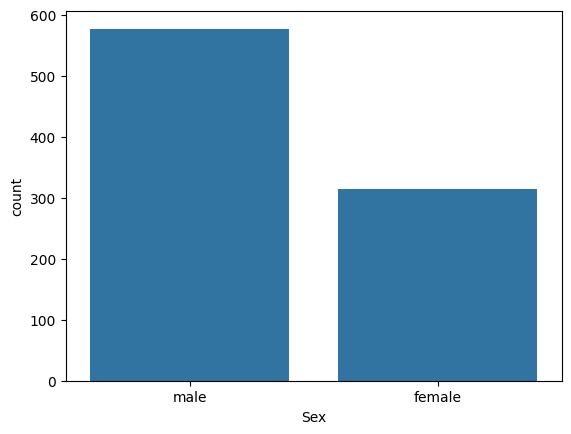

In [203]:
sns.countplot(x = gender)

<Axes: xlabel='Sex', ylabel='count'>

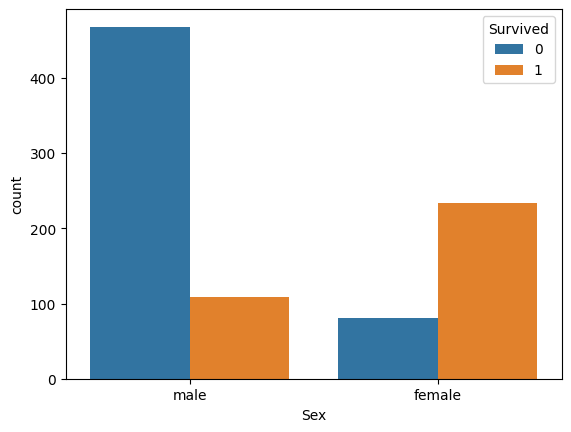

In [204]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived')

In [205]:
sex = pd.get_dummies(gender, drop_first = True)

In [206]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [207]:
X_train = pd.concat([X_train, sex], axis = 1)

In [208]:
X_train.drop(['Sex'], axis = 1, inplace = True)

<Axes: xlabel='Pclass', ylabel='count'>

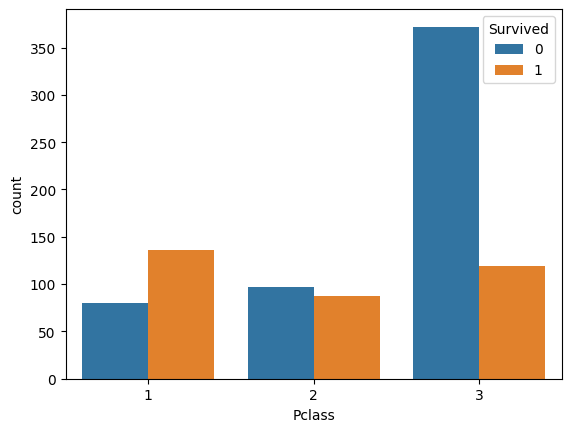

In [209]:
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived')

In [210]:
X_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [211]:
pclass = pd.get_dummies(X_train['Pclass'], prefix = 'Class_', drop_first = True)

In [212]:
pclass

,Class__2,Class__3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


In [213]:
X_train = pd.concat([X_train, pclass], axis = 1)

In [214]:
X_train.drop(['Pclass'], axis = 1, inplace = True)

In [215]:
X_train.head()

,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Class__2,Class__3
0,22.0,1,0,7.2500,NaN,S,True,False,True
1,38.0,1,0,71.2833,C85,C,False,False,False
2,26.0,0,0,7.9250,NaN,S,False,False,True
3,35.0,1,0,53.1000,C123,S,False,False,False
4,35.0,0,0,8.0500,NaN,S,True,False,True


In [216]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [217]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

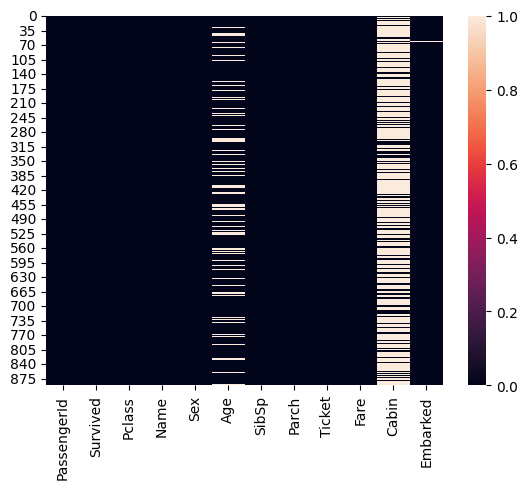

In [218]:
sns.heatmap(train_df.isnull())

Cabin is removed because of large number of missing values in Cabin variable.

In [219]:
X_train.drop(['Cabin'], axis = 1, inplace = True)

__Now, the Age also has missing values in it.__

__To fill age we are having 3 approaches for now.__

    1. Taking full dataset age average and fill it which is bad due to spread of data
    2. Taking average based on Pclass category as there is trend of more old people in high class while young in low classes.
    3. Use Linear Regression to predict the age values.

We Gonna try 3rd Approach for now and predict the Missing Values of Age.

(Self)

In [220]:
X_train.head()

,Age,SibSp,Parch,Fare,Embarked,male,Class__2,Class__3
0,22.0,1,0,7.2500,S,True,False,True
1,38.0,1,0,71.2833,C,False,False,False
2,26.0,0,0,7.9250,S,False,False,True
3,35.0,1,0,53.1000,S,False,False,False
4,35.0,0,0,8.0500,S,True,False,True


In [221]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   male      891 non-null    bool   
 6   Class__2  891 non-null    bool   
 7   Class__3  891 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 37.5+ KB


In [222]:
X_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [223]:
X_train['Embarked'].fillna('S', inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_29440\4171238369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Embarked'].fillna('S', inplace = True)


In [224]:
X_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [225]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    object 
 5   male      891 non-null    bool   
 6   Class__2  891 non-null    bool   
 7   Class__3  891 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 37.5+ KB


__Now, we combine y with this dataset.__

In [226]:
data = pd.concat([X_train, y_train], axis = 1)

In [227]:
data.head(10)

,Age,SibSp,Parch,Fare,Embarked,male,Class__2,Class__3,Survived
0,22.0,1,0,7.2500,S,True,False,True,0
1,38.0,1,0,71.2833,C,False,False,False,1
2,26.0,0,0,7.9250,S,False,False,True,1
3,35.0,1,0,53.1000,S,False,False,False,1
4,35.0,0,0,8.0500,S,True,False,True,0
5,NaN,0,0,8.4583,Q,True,False,True,0
6,54.0,0,0,51.8625,S,True,False,False,0
7,2.0,3,1,21.0750,S,True,False,True,0
8,27.0,0,2,11.1333,S,False,False,True,1
9,14.0,1,0,30.0708,C,False,True,False,1


In [232]:
data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [235]:
n_age = data[data['Age'].isnull()]

In [238]:
data.dropna(subset = ['Age'], inplace = True)

In [240]:
n_age.drop(['Age'], axis = 1, inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_29440\2661351889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_age.drop(['Age'], axis = 1, inplace = True)


In [241]:
n_age.head()

,SibSp,Parch,Fare,Embarked,male,Class__2,Class__3,Survived
5,0,0,8.4583,Q,True,False,True,0
17,0,0,13.0000,S,True,True,False,1
19,0,0,7.2250,C,False,False,True,1
26,0,0,7.2250,C,True,False,True,0
28,0,0,7.8792,Q,False,False,True,1


Now, We have to figure out what are important features for predicting age.

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   SibSp     714 non-null    int64  
 2   Parch     714 non-null    int64  
 3   Fare      714 non-null    float64
 4   Embarked  714 non-null    object 
 5   male      714 non-null    bool   
 6   Class__2  714 non-null    bool   
 7   Class__3  714 non-null    bool   
 8   Survived  714 non-null    int64  
dtypes: bool(3), float64(2), int64(3), object(1)
memory usage: 41.1+ KB


In [243]:
# By logic, gender not influence age, Embarked also.

data.drop(['male', 'Embarked'], axis = 1, inplace = True)

In [244]:
data.describe()

,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,29.699118,0.512605,0.431373,34.694514,0.406162
std,14.526497,0.929783,0.853289,52.918930,0.491460
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,8.050000,0.000000
50%,28.000000,0.000000,0.000000,15.741700,0.000000
75%,38.000000,1.000000,1.000000,33.375000,1.000000
max,80.000000,5.000000,6.000000,512.329200,1.000000


<Axes: xlabel='SibSp', ylabel='Age'>

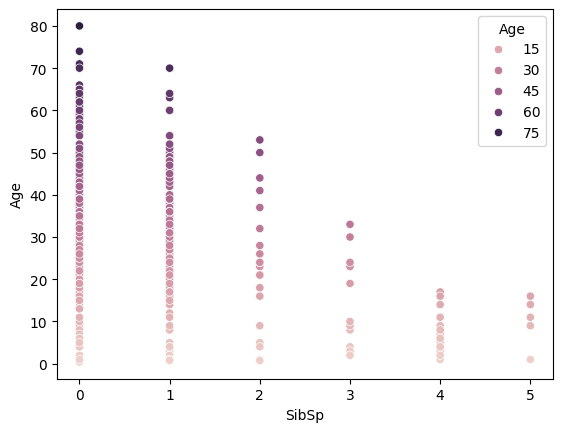

In [256]:
sns.scatterplot(data = data, x = 'SibSp', y = 'Age')

<Axes: xlabel='Parch', ylabel='Age'>

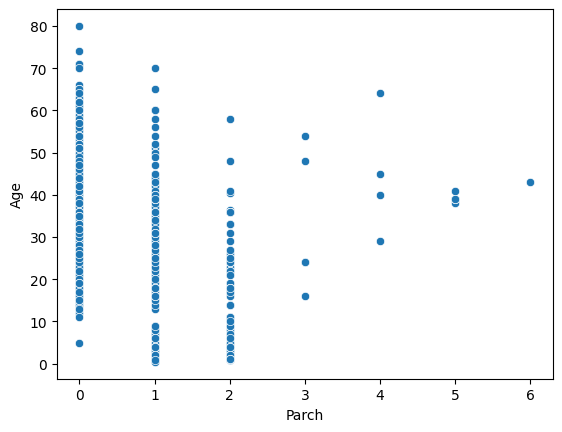

In [257]:
sns.scatterplot(data = data, x = 'Parch', y = 'Age')